# Tunnel through a 1D barrier

Copyright (C) 2022, Oriol Vendrell <oriol.vendrell@uni-heidelberg.de>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
MEDIUM_SIZE = 10
plt.rc('axes', labelsize=MEDIUM_SIZE)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Time-Independent Schrödinger Equation for Unbound States in 1D

We consider the TISE for the case of a particle colliding with a square potential energy barrier of height $V$ and width $L$. The particle, for example an electron, has total energy $E$ and arrives at the barrier propagating from left to right, i.e. with a positive momentum.

The wavefunction before (region I), in (region II), and after (region III) the barrier takes the form:

\begin{align}
    \psi_{I} & = A e^{i k x} + B e^{-i k x}        & \\
    \psi_{II} & = C e^{i \beta x} + D e^{-i \beta x} & \textrm{for}~E>V \\
    \psi_{II} & = C e^{\beta x} + D e^{-\beta x}     & \textrm{for}~V>E \\
    \psi_{III} & = F e^{i k x} + G e^{-i k x}        &
\end{align}

The conditions of continuity of the wavefunction and of its first derivative at $x=0$ (start of the barrier)
and $x=L$ (end of the barrier)

\begin{align}
    A + B      & = C + D \\
    ikA - ikB  & = \beta C - \beta D
\end{align}

can be written in matrix form:
$$
    \begin{pmatrix}
    1 & 1 \\
    ik & -ik
    \end{pmatrix}
    \begin{pmatrix}
    A \\ B
    \end{pmatrix}
    =
    \begin{pmatrix}
    1 & 1 \\
    \beta & -\beta
    \end{pmatrix}
    \begin{pmatrix}
    C \\ D
    \end{pmatrix}
$$

and correpondingly for the conditions at the end of the barrier (x=L):
$$
    \begin{pmatrix}
    e^{\beta L}  & e^{-\beta L}  \\
    \beta e^{\beta L} & -\beta e^{-\beta L}
    \end{pmatrix}
    \begin{pmatrix}
    C \\ D
    \end{pmatrix}
    =
    \begin{pmatrix}
    e^{ikL} &  e^{-ikL} \\
    ike^{ikL} & -ike^{-ikL}
    \end{pmatrix}
    \begin{pmatrix}
    F \\ G
    \end{pmatrix}.
$$

The parameters $k$ and $\beta$ depend on the energy of the particle and height of the barrier

\begin{align}
    k & = \frac{\sqrt{2 m E}}{\hbar} \\
    \beta & = \frac{\sqrt{2 m (V-E)}}{\hbar}
\end{align}

The incoming amplitude $A$ can always be set to 1. The physically relevant parameters are
\begin{align}
    T & = \frac{|F|^2}{|A|^2} & \text{Transmission coefficient} \\
    R & = \frac{|B|^2}{|A|^2} & \text{Reflection coefficient}
\end{align}
where $T + R = 1$.

Defining the matrices above as

$$
    \begin{pmatrix}
    1 & 1 \\
    ik & -ik
    \end{pmatrix} = \mathbf{M}_a ;
    \begin{pmatrix}
    1 & 1 \\
    \beta & -\beta
    \end{pmatrix} = \mathbf{M}_b ;
    \begin{pmatrix}
    e^{\beta L}  & e^{-\beta L}  \\
    \beta e^{\beta L} & -\beta e^{-\beta L}
    \end{pmatrix} = \mathbf{M}_c ;
    \begin{pmatrix}
    e^{ikL} &  e^{-ikL} \\
    ike^{ikL} & -ike^{-ikL}
    \end{pmatrix} = \mathbf{M}_d
$$

one can write a relation between the left ($A$, $B$) and right ($F$, $G$) coefficients:

\begin{align}
    \begin{pmatrix}
    A \\ B
    \end{pmatrix} & =
    \mathbf{M}_a^{-1} \mathbf{M}_b \mathbf{M}_c^{-1} \mathbf{M}_d
    \begin{pmatrix}
    F \\ G
    \end{pmatrix} \\
    \begin{pmatrix}
    A \\ B
    \end{pmatrix} & =
    \mathbf{T}
    \begin{pmatrix}
    F \\ G
    \end{pmatrix}
\end{align}

The matrix $\mathbf{T}$ can be numerically evaluated since all parameters of all matrices are known.

$G=0$ because there are no particles propagating towards the barrier from the right.

In [2]:
def tunnel(E, V=1.0, L=3.0, m=1.0):
    """
    Calculate transmission and reflection probability in a 1D square barrier
    
    E - particle's energy
    V - barrier height
    L - barrier width
    m - particle's mass
    
    All parameters in atomic units
    """
    kappa = 1j*np.sqrt(2*m*E)
    if E > V:
        beta = 1j*np.sqrt(2*m*(E-V))
    else:
        beta = np.sqrt(2*m*(V-E))
    expb = np.exp(beta*L)
    expk = np.exp(kappa*L)
    Ma = np.array([[1, 1],[kappa, -kappa]])
    Mb = np.array([[1, 1],[beta, -beta]])
    Mc = np.array([[expb, 1/expb],[beta*expb, -beta/expb]])
    Md = np.array([[expk, 1/expk], [kappa*expk, -kappa/expk]])
    iMa = np.linalg.inv(Ma)
    iMc = np.linalg.inv(Mc)
    t1 = np.dot(iMa, Mb)
    t2 = np.dot(iMc, Md)
    T = np.dot(t1, t2)
    Trans = np.abs(1/T[0, 0])**2
    Reflx = np.abs(T[1, 0]/T[0, 0])**2
    return Trans, Reflx

In [6]:
def plot_transmission(V=1.0, L=3.0, m=1.0):
    Np = 2002
    Elist = np.linspace(0.02, 7, Np)
    Tlist = np.zeros(Np, float)
    for p, e in enumerate(Elist):
        T, R = tunnel(e, V=V, L=L, m=m)
        Tlist[p] = T
        plt.xlabel('E')
        plt.ylabel('T')
    plt.plot(Elist, Tlist)

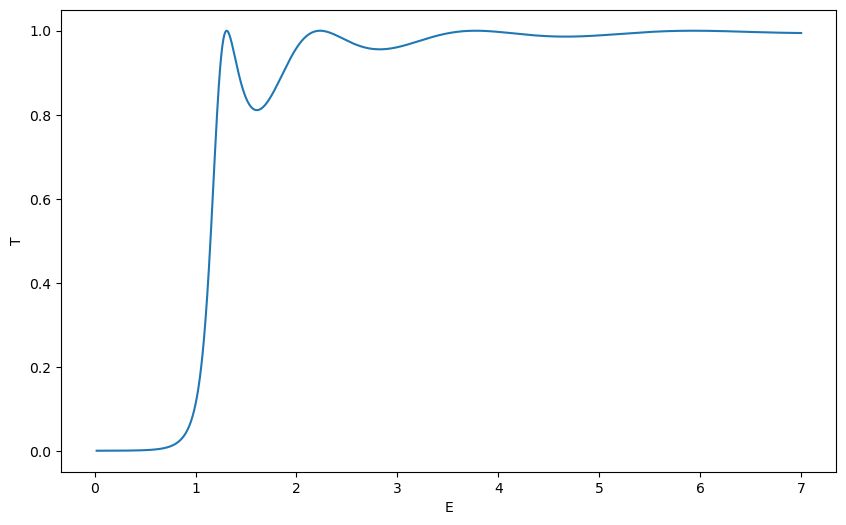

In [7]:
plot_transmission(L=4.0, m=1)

In [8]:
interact(plot_transmission,
         L=(1.0, 15.0, 0.5),
         V=(0.5, 3, 0.3),
         m=(1, 500, 50)
        )

interactive(children=(FloatSlider(value=1.0, description='V', max=3.0, min=0.5, step=0.3), FloatSlider(value=3…

<function __main__.plot_transmission(V=1.0, L=3.0, m=1.0)>